1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import linalg as la

In [2]:
N=1000
x1=np.random.normal(0,1,N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2

# covariance matrix
X=np.array([x1,x2,x3])

cov=np.cov(X)

l, V = la.eig(cov)

U, S, Vt = la.svd(cov)

print(l)
print(S)

l = np.real_if_close(l) # only the real part
Xr = np.dot(V.T, X)

[2.49598219e+01+0.j 1.43645112e-15+0.j 1.91947873e+00+0.j]
[2.49598219e+01 1.91947873e+00 2.14167563e-15]


[[2.49598219e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.43645112e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.91947873e+00]]

By selecting the component 1, we retain 92.86% of the total variability
By selecting the component 2, we retain 0.00% of the total variability
By selecting the component 3, we retain 7.14% of the total variability

Since the 100% of the total variability is retained by the component 1 and 3 (first and second) these two are significant
This can be seen from the graph rotated, only x1 vs x3 (first vs second component analysis) is not trivial
However x3 is dependent on x1 and most of variability is retained by the first component and that makes sense for how data is created


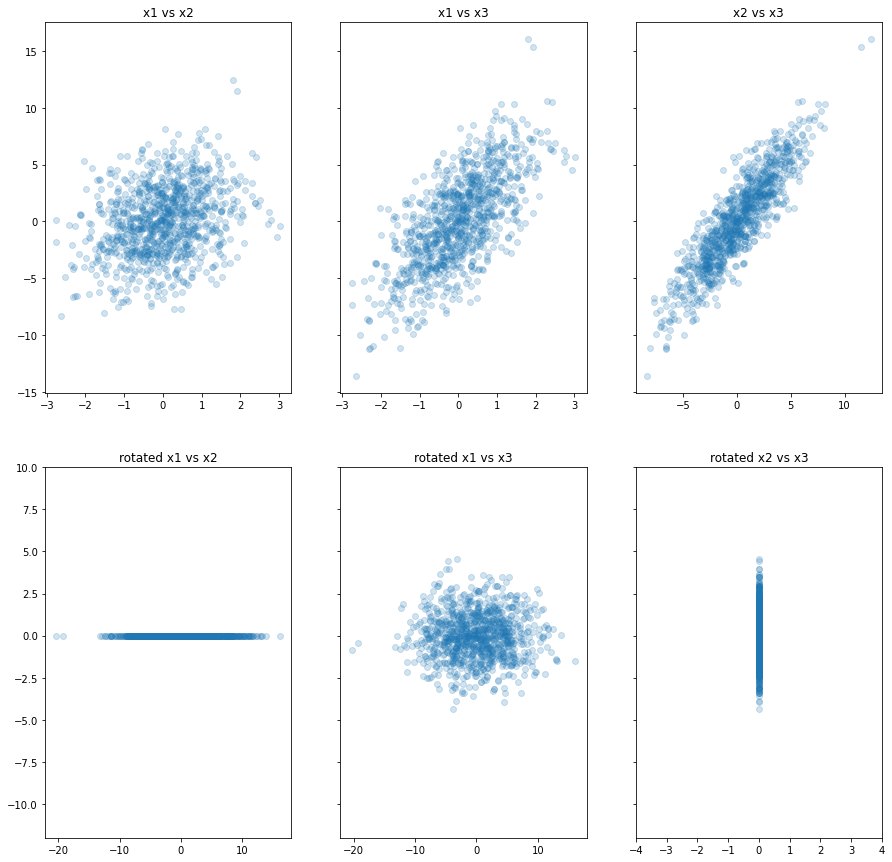

In [3]:
#rotation according to PCA analysis


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15),sharey='row')
axes[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
axes[0,0].set_title('x1 vs x2')

axes[1,0].scatter(Xr[0,:], Xr[1,:], alpha=0.2)
axes[1,0].set_title('rotated x1 vs x2')

axes[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[0,1].set_title('x1 vs x3')

axes[1,1].scatter(Xr[0,:], Xr[2,:], alpha=0.2)
axes[1,1].set_title('rotated x1 vs x3')

axes[1,2].set_xlim(-4,4)
axes[1,2].set_ylim(-12,10)

axes[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
axes[0,2].set_title('x2 vs x3')

axes[1,2].scatter(Xr[1,:], Xr[2,:], alpha=0.2)
axes[1,2].set_title('rotated x2 vs x3')

# I shared the axis by column but the last one need it by row but it would be affect even previous data so it's better to do in this way

# dimensionality analysis 

Lambda = np.diag(l)
print(Lambda)

print("\nBy selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[0,0]*100/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[1,1]*100/Lambda.trace()))
print("By selecting the component 3, we retain %.2f%% of the total variability" % (Lambda[2,2]*100/Lambda.trace()))

print("\nSince the 100% of the total variability is retained by the component 1 and 3 (first and second) these two are significant")
print("This can be seen from the graph rotated, only x1 vs x3 (first vs second component analysis) is not trivial")
print('However x3 is dependent on x1 and most of variability is retained by the first component and that makes sense for how data is created')


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [4]:
x1=x1+np.random.normal(0,2)
x2=x2+np.random.normal(0,3)
x3=x3+np.random.normal(0,1)

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [6]:
import pandas as pd
data = pd.read_csv('magic04.data',nrows=1000)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','category']  # provided in magic.names

del data['category']   # not numerical data
cov_magic = np.cov(data.T)
l_magic, V_magic = la.eig(cov_magic)

l_magic = np.real(l_magic)
print(l_magic)

Lambda_magic = np.diag(l_magic)
p=0
i=0
while p<0.99:
    p+=(Lambda_magic[i][i]/Lambda_magic.trace())
    i+=1
print('\nTo achive',p,'of the total variability,',i,'parameters are needed')


[5.38228278e+03 1.65853770e+03 9.48033215e+02 3.83059297e+02
 2.59759249e+02 1.84642352e+02 3.65376511e+01 4.50759550e-02
 8.87701449e-03 3.54537447e-04]

To achive 0.995866672899014 of the total variability, 6 parameters are needed
